In [3]:
#!/usr/bin/env python
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
pd.set_option('display.max_rows', None)

In [4]:
# Reading data
path = '/st1/loufie/bootcamp/data/'
filename = 'IDW_Met_TimeSeries_D01_NocheBuena.csv'

In [5]:
# Read the data into a pandas dataframe, and define columns, header and index
df = pd.read_csv(filename, header=0, delimiter=r"\s+", index_col='Time',
        names =['Time','IDW',
                '26072','26093',
                '26096'])

In [6]:
 #display(df)

In [7]:
# Rename columns, and index
df.columns = ['IDW','St1','St2',
                'St3']

In [8]:
#display(df)

In [9]:
# See that the index is just an array
df.index.values

array(['1/1/80', '1/2/80', '1/3/80', ..., '12/29/20', '12/30/20',
       '12/31/20'], dtype=object)

In [10]:
# Set index data type to a DateTime object
df.index = pd.to_datetime(df.index)
# Now we should see the index is a DateTime object
df.index

DatetimeIndex(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-05', '1980-01-06', '1980-01-07', '1980-01-08',
               '1980-01-09', '1980-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Time', length=14976, freq=None)

In [11]:
##########################
# Navigate the DataFrame #
##########################
df.shape  # See how many rows and columns the data has

(14976, 4)

In [12]:
df.head(5) # look at the first x rows of the data

,IDW,St1,St2,St3
Time,,,,
1980-01-01,0.0,NaN,0.0,0.0
1980-01-02,0.0,NaN,0.0,0.0
1980-01-03,0.0,NaN,0.0,0.0
1980-01-04,0.0,NaN,0.0,0.0
1980-01-05,0.0,NaN,0.0,0.0


In [13]:
df.tail(4) # look at the last  x rows  of the data

,IDW,St1,St2,St3
Time,,,,
2020-12-28,0.0,NaN,NaN,NaN
2020-12-29,0.0,NaN,NaN,NaN
2020-12-30,0.0,NaN,NaN,NaN
2020-12-31,0.0,NaN,NaN,NaN


In [14]:
df.iloc[20:30] # grab any subset of rows to look at


,IDW,St1,St2,St3
Time,,,,
1980-01-21,2.11538,NaN,1.0,5.9
1980-01-22,0.00000,NaN,0.0,0.0
1980-01-23,0.00000,NaN,0.0,0.0
1980-01-24,0.00000,NaN,0.0,0.0
1980-01-25,0.00000,NaN,0.0,0.0
1980-01-26,0.00000,NaN,0.0,0.0
1980-01-27,0.00000,NaN,0.0,0.0
1980-01-28,0.00000,NaN,0.0,0.0
1980-01-29,0.00000,NaN,0.0,0.0


In [15]:
df.IDW[350:360]  #Grab a subset of just the temp data to look at

Time
1980-12-16    0.0
1980-12-17    0.0
1980-12-18    0.0
1980-12-19    0.0
1980-12-20    0.0
1980-12-21    0.0
1980-12-22    0.0
1980-12-23    0.0
1980-12-24    0.0
1980-12-25    0.0
Name: IDW, dtype: float64

In [16]:
df.loc['2013-07-27']  #find a specific date

IDW    0.0
St1    0.0
St2    0.0
St3    0.0
Name: 2013-07-27 00:00:00, dtype: float64

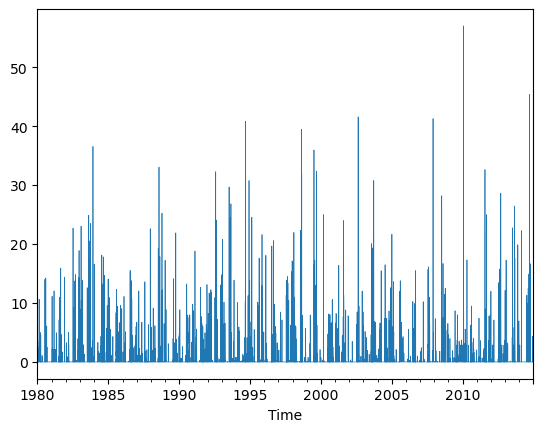

In [17]:
# make a quick plot

ax=df['IDW'].loc['1980-01-01':'2014-12-31'].plot(linewidth=0.5)

#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
#df.loc[DatetimeIndex]
#df.loc[['1980-01-10':'2020-12-31']]
#plt.plot(df.DatetimeIndex, df.IDW)
#x = df['IDW'].loc[:]
#plt.plot(x, y)
#plt(linewidth=0.5)
#y = df.loc[DatetimeIndex]
#plt.plot(x, y)

#ax=df['IDW'].loc['2013-07-27'].plt(linewidth=0.5)
#ax.set_ylabel('Precipitation [mm/day]')
#ax.set_xlabel('Date Time')
#plt.show()

In [18]:
######################################################
# Resample to daily data and make more detailed plot #
######################################################
# resample to daily, and chose how to group sub-daily data, mean for T and last value for P
Month_idw = df['IDW'].resample('1M').mean()
Month_st1 = df['St1'].resample('1M').mean()
Month_st2 = df['St2'].resample('1M').mean()
Month_st3 = df['St3'].resample('1M').mean()

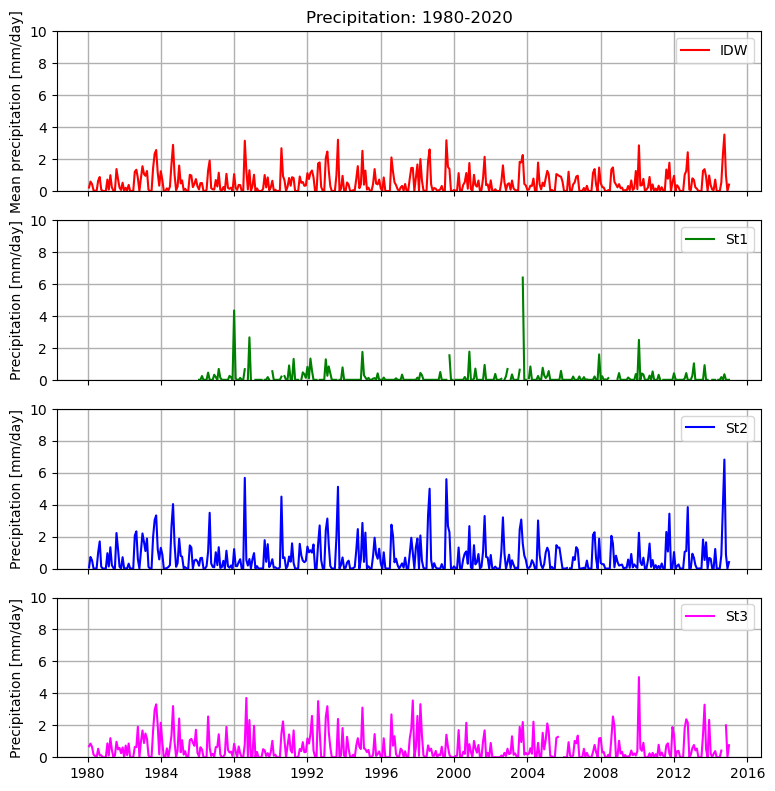

In [22]:
# Make a detailed plot
# set up the fig and axis, we'll make a panel plot with a shared x axis
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(8,8), sharex=True)

# set plotting dates
start = '1980-01-01'
end = '2014-12-31'

#display(Month_idw)

# on ax1 plot air temp data, no markers, solid line, red, with the KTUS label
ax1.plot(Month_idw[start:end],marker="",linestyle='-',alpha=1.,color="Red",label="IDW")
# put label/legend in top right =1
ax1.legend(loc=1)
# add major and minor gridlines
ax1.grid(which='major', linestyle='-', linewidth='1.0')
ax1.grid(which='minor', linestyle=':', linewidth='0.5')
# add y-axis label
ax1.set_ylabel('Mean precipitation [mm/day]') 
# set limits of y axis
ax1.set_ylim(0,10)
# set title for the whole panel plot
ax1.set_title('Precipitation: 1980-2020')

# same again but on ax2 and for dew point temp
ax2.plot(Month_st1[start:end],marker="",linestyle='-',alpha=1.,color="Green",label="St1")
ax2.legend(loc=1)
ax2.grid(which='major', linestyle='-', linewidth='1.0')
ax2.grid(which='minor', linestyle=':', linewidth='0.5')
ax2.set_ylabel('Precipitation [mm/day]') 
ax2.set_ylim(0,10)

# same again but on ax3 and for dew point temp
ax3.plot(Month_st2[start:end],marker="",linestyle='-',alpha=1.,color="Blue",label="St2")
ax3.legend(loc=1)
ax3.grid(which='major', linestyle='-', linewidth='1.0')
ax3.grid(which='minor', linestyle=':', linewidth='0.5')
ax3.set_ylabel('Precipitation [mm/day]') 
ax3.set_ylim(0,10)

# same again but on ax3 and for dew point temp
ax4.plot(Month_st3[start:end],marker="",linestyle='-',alpha=1.,color="Magenta",label="St3")
ax4.legend(loc=1)
ax4.grid(which='major', linestyle='-', linewidth='1.0')
ax4.grid(which='minor', linestyle=':', linewidth='0.5')
ax4.set_ylabel('Precipitation [mm/day]') 
ax4.set_ylim(0,10)

# formatting of x-axis dates, rotate them 90 degrees 
#fig.autofmt_xdate(rotation=90, ha='center')
# put a label every two days
#ax3.xaxis.set_major_locator(mdates.DayLocator(interval=2))
# but make sure minor ticks show each day
#ax3.get_xaxis().set_minor_locator(mdates.DayLocator())
# set label and limits
#ax3.set_xlabel('Date')
#ax3.set_xlim(start,end)

# name, save and show the plot
plotfile = 'IDW_NocheBuena_timeseries_from_pandas_df.png'
plt.tight_layout()
sf = fig.savefig(plotfile, dpi=300)
plt.show()
#plt.close()
